# DESAFIO 3

In [1]:
import numpy as np
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.animation as animation
from particula import Particula, Particula2, Particula3
from funcoes import step
from funcoes import lista_inicial, lista_inicial2, lista_inicial3, lista_inicial4
plt.style.use('seaborn-bright')
import lmfit
from sklearn.linear_model import LinearRegression

C:\Users\marcos220057\AppData\Local\Temp\ipykernel_20860\2674304838.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


In [ ]:
# parâmetros sistema:
NUM_PARTICULAS= 140
TAMANHO_CAIXA = 200
MASSA = 0.5
RAIO = 1
ECMIN = 45
CATALISE = 0.1

# parâmetros simulação:
TFIM = 40
NUM_STEPS = 400
STEP = TFIM/NUM_STEPS

In [ ]:
PARTICULAS = lista_inicial2(NUM_PARTICULAS, raio = RAIO, massa = MASSA, tamanho_caixa = TAMANHO_CAIXA, reatividade = ECMIN, catalise = False)
print(len(PARTICULAS))
for i in range(NUM_STEPS):
    step(PARTICULAS, STEP, TAMANHO_CAIXA)

In [ ]:
PARTICULAS2 = lista_inicial2(NUM_PARTICULAS, raio = RAIO, massa = MASSA, tamanho_caixa = TAMANHO_CAIXA, reatividade = ECMIN, catalise = CATALISE)
print(len(PARTICULAS))
for i in range(NUM_STEPS):
    step(PARTICULAS2, STEP, TAMANHO_CAIXA)

In [ ]:
PARTICULAS3 = lista_inicial3(NUM_PARTICULAS, raio = RAIO, massa = MASSA, tamanho_caixa = TAMANHO_CAIXA, reatividade = ECMIN, catalise = CATALISE)
print(len(PARTICULAS))
for i in range(NUM_STEPS):
    step(PARTICULAS3, STEP, TAMANHO_CAIXA)

# Resultados:

In [ ]:
trajetorias = []
existencia = []
cores = []
for i in PARTICULAS:
    traj = list(i.trapos)
    exist = list(i.lista_existe)
    lista_cores = list(i.lista_tipo)
    trajetorias.append(traj)
    existencia.append(exist)
    cores.append(lista_cores)
A = []
B = []
for k in range(NUM_STEPS):
    a = 0
    b = 0
    
    for h in range(len(trajetorias)):
        cor = cores[h][k]
        e = existencia[h][k]
        if cor == '0' and e == 1:
            a = a+1
        if cor == 'r' and e == 1:
            b = b+1
    A.append(a)
    B.append(b)


In [ ]:
trajetorias2 = []
existencia2 = []
cores2 = []
for i in PARTICULAS2:
    traj2 = list(i.trapos)
    exist2 = list(i.lista_existe)
    lista_cores2 = list(i.lista_tipo)
    trajetorias2.append(traj2)
    existencia2.append(exist2)
    cores2.append(lista_cores2)
A2 = []
B2 = []
for k in range(NUM_STEPS):
    a = 0
    b = 0
    
    for h in range(len(trajetorias2)):
        cor = cores2[h][k]
        e = existencia2[h][k]
        if cor == '0' and e == 1:
            a = a+1
        if cor == 'r' and e == 1:
            b = b+1
    A2.append(a)
    B2.append(b)


trajetorias3 = []
existencia3 = []
cores3 = []
for i in PARTICULAS3:
    traj3 = list(i.trapos)
    exist3 = list(i.lista_existe)
    lista_cores3 = list(i.lista_tipo)
    trajetorias3.append(traj3)
    existencia3.append(exist3)
    cores3.append(lista_cores3)
A3 = []
B3 = []
for k in range(NUM_STEPS):
    a = 0
    b = 0
    
    for h in range(len(trajetorias3)):
        cor = cores3[h][k]
        e = existencia3[h][k]
        if cor == '0' and e == 1:
            a = a+1
        if cor == 'r' and e == 1:
            b = b+1
    A3.append(a)
    B3.append(b)


In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12, 9))
ax.set_title('Simulação de reação química', fontsize = 24)
ax.set_ylabel('Número de partículas', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 18)
ax.grid('- -')
ax.plot(range(NUM_STEPS), A, linewidth = 2.5, label = 'Sem Catálise', c = 'b')
#ax.plot(range(NUM_STEPS), B, linewidth = 2.5, c = 'b')

ax.plot(range(NUM_STEPS), A2, linewidth = 2.5, label = 'Com Catálise em uma parede',c='g')
#ax.plot(range(NUM_STEPS), B2, linewidth = 2.5, c = 'g')

ax.plot(range(NUM_STEPS), A3, linewidth = 2.5, label = 'Com Catálise em duas paredes',c='r')
#ax.plot(range(NUM_STEPS), B3, linewidth = 2.5, c = 'r')
ax.legend(fontsize=18)


#plt.savefig(r'resultados/react', dpi = 200)

In [ ]:
dados = pd.DataFrame()

dados['A1'] = A
dados['A2'] = A2
dados['A3'] = A3

dados.to_csv('resultados/dados_catalise.csv')

In [ ]:
dados = pd.read_csv('resultados/dados_catalise.csv')
tempo = list(range(NUM_STEPS))
def funcao_fit(x, k,C, D):
    return C*np.exp(-k*x) + D

fig, ax = plt.subplots(1,1, figsize = (12, 9))
ax.set_title('Simulação de reação química', fontsize = 24)
ax.set_ylabel('Número de partículas A', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 18)
ax.grid('- -')

for i in [1,2,3]:
    A = dados[f'A{i}']
    NUM_STEPS = len(A)
    funcao_fit_model=lmfit.Model(funcao_fit)
    funcao_fit_model.set_param_hint('D',value=32, vary=True)#,min= -10,max=10,vary=True) 
    funcao_fit_model.set_param_hint('C',value=150, vary=True)#,min= -10,max=10,vary=True) 
    funcao_fit_model.set_param_hint('k',value=0.05, vary=True)#,min= -10,max=10,vary=True) 

    param = funcao_fit_model.make_params()
    results = funcao_fit_model.fit(A, x = tempo, params = param)
    k = results.params['k'].value
    D = results.params['D'].value
    C = results.params['C'].value
    x_fit = np.linspace(0, NUM_STEPS)
    y_fit = funcao_fit(x_fit, k, C, D)
    b_fit = (-np.array(y_fit) + A[0])/2
    k = results.params['k'].value
    print(f'k para {i-1} paredes foi {k}')
    ax.plot(tempo, A, label = f'Catálise em {i-1} paredes')
    ax.plot(x_fit, y_fit, c = '0', linestyle = '--')
    
ax.legend(fontsize=18)
plt.savefig('resultados/paredes.png', dpi = 200)

In [ ]:
fig, ax = plt.subplots(1,1)
x = [0,1,2]
y = [0.0036874452524610244, 0.006185485575330592, 0.009213350146535688]
ax.set_xticks([0,1,2])
ax.grid('--')
ax.set_xlabel('Paredes catalisadoras')
ax.set_ylabel('Coeficiente k (u.a)')
ax.set_title('Velocidade de reação')
ax.scatter(x,y, s = 60)
plt.savefig('resultados/area.png', dpi = 200)

## Temperatura

In [48]:
# parâmetros sistema:
NUM_PARTICULAS= 100
TAMANHO_CAIXA = 100
MASSA = 0.5
RAIO = 1
ECMIN = 500
CATALISE = 0.2

# parâmetros simulação:
TFIM = 40
NUM_STEPS = 400
STEP = TFIM/NUM_STEPS

V_MEDIA = [33, 35, 40]

100
100
100


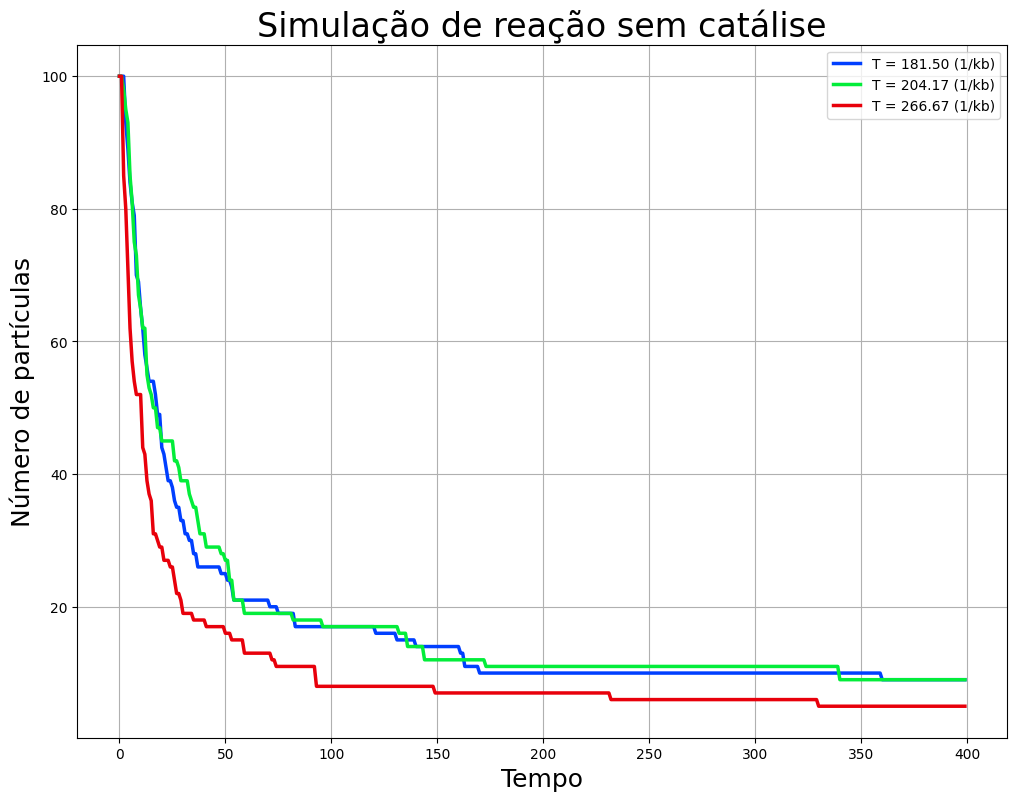

In [49]:
A_final = []
fig, ax = plt.subplots(1,1, figsize = (12, 9))
ax.set_title('Simulação de reação sem catálise', fontsize = 24)
ax.set_ylabel('Número de partículas', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 18)
ax.grid('- -')
for vmedia in V_MEDIA:
    PARTICULAS = lista_inicial4(NUM_PARTICULAS, raio = RAIO, massa = MASSA, tamanho_caixa = TAMANHO_CAIXA, reatividade = ECMIN, catalise = False, vmedia = vmedia)
    print(len(PARTICULAS))
    for i in range(NUM_STEPS):
        step(PARTICULAS, STEP, TAMANHO_CAIXA)
    
    trajetorias = []
    existencia = []
    cores = []
    for i in PARTICULAS:
        traj = list(i.trapos)
        exist = list(i.lista_existe)
        lista_cores = list(i.lista_tipo)
        trajetorias.append(traj)
        existencia.append(exist)
        cores.append(lista_cores)
    A = []
    B = []
    for k in range(NUM_STEPS):
        a = 0
        b = 0

        for h in range(len(trajetorias)):
            cor = cores[h][k]
            e = existencia[h][k]
            if cor == '0' and e == 1:
                a = a+1
            if cor == 'r' and e == 1:
                b = b+1
        A.append(a)
        B.append(b)

    ax.plot(range(NUM_STEPS), A, linewidth = 2.5, label = f'T = {(0.5*(vmedia)**2/3):.2f} (1/kb)')
    A_final.append(A[-1])
ax.legend()
#plt.savefig('resultados/temps_sem_cat.png', dpi = 200)

100
100
100


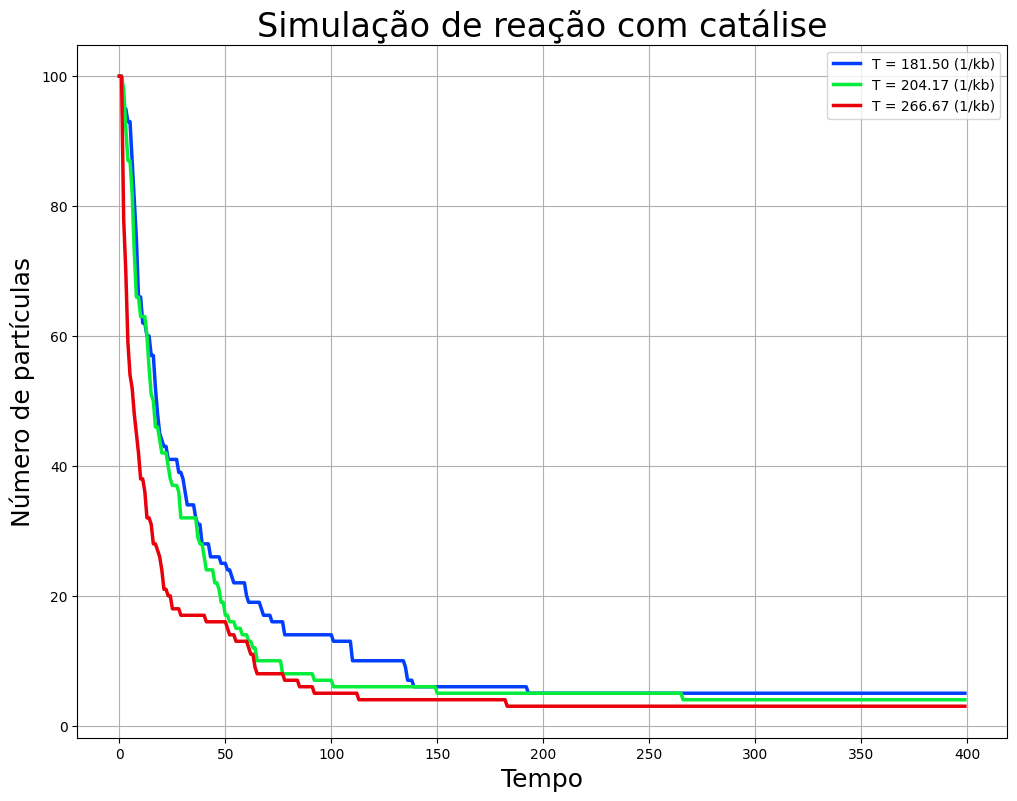

In [50]:
A_final_cat = []
fig, ax = plt.subplots(1,1, figsize = (12, 9))
ax.set_title('Simulação de reação com catálise', fontsize = 24)
ax.set_ylabel('Número de partículas', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 18)
ax.grid('- -')
for vmedia in V_MEDIA:
    PARTICULAS = lista_inicial4(NUM_PARTICULAS, raio = RAIO, massa = MASSA, tamanho_caixa = TAMANHO_CAIXA, reatividade = ECMIN, catalise = CATALISE, vmedia = vmedia)
    print(len(PARTICULAS))
    for i in range(NUM_STEPS):
        step(PARTICULAS, STEP, TAMANHO_CAIXA)
    
    trajetorias = []
    existencia = []
    cores = []
    for i in PARTICULAS:
        traj = list(i.trapos)
        exist = list(i.lista_existe)
        lista_cores = list(i.lista_tipo)
        trajetorias.append(traj)
        existencia.append(exist)
        cores.append(lista_cores)
    A = []
    B = []
    for k in range(NUM_STEPS):
        a = 0
        b = 0

        for h in range(len(trajetorias)):
            cor = cores[h][k]
            e = existencia[h][k]
            if cor == '0' and e == 1:
                a = a+1
            if cor == 'r' and e == 1:
                b = b+1
        A.append(a)
        B.append(b)

    ax.plot(range(NUM_STEPS), A, linewidth = 2.5, label = f'T = {(0.5*(vmedia)**2/3):.2f} (1/kb)')
    A_final_cat.append(A[-1])
ax.legend()
#plt.savefig('resultados/temps_com_cat.png', dpi = 200)


In [52]:
#dados_teste = pd.read_csv('dados_teste.csv')
#T1 = dados_teste['T1']
#A_final1 = dados_teste['A_final']
#A_final_cat_1 = dados_teste['A_final_cat']

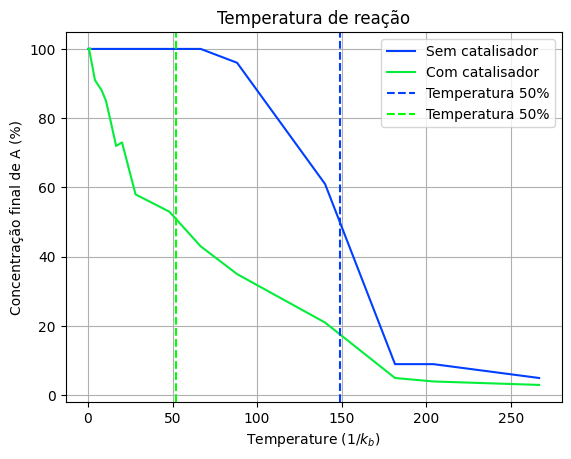

In [62]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'Temperature ($1/k_b$)')
ax. set_ylabel('Concentração final de A (%)')
ax.set_title('Temperatura de reação')
ax.plot(list(T1) + list(0.5*np.array(V_MEDIA)**2/3), list(A_final1)+list(A_final), label = 'Sem catalisador')
ax.plot(list(T1)+list(0.5*np.array(V_MEDIA)**2/3), list(A_final_cat_1)+list(A_final_cat), label = 'Com catalisador')
ax.axvline(149, linestyle = '--', label = 'Temperatura 50%')

ax.axvline(52, linestyle = '--', label = 'Temperatura 50%', c = 'lime')

ax.grid('--')
ax.legend()
plt.savefig('resultados/temp_catalise.png', dpi = 200)

In [ ]:
#dados_teste = pd.DataFrame()
#dados_teste['T1'] = 0.5*np.array(V_MEDIA)**2/3
#dados_teste['A_final'] = A_final
#dados_teste['A_final_cat'] = A_final_cat

#dados_teste.to_csv('dados_teste.csv')